In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wall-art-sales/Wall Art sales - Sheet1.csv


In [2]:
# reading csv

df = pd.read_csv('../input/wall-art-sales/Wall Art sales - Sheet1.csv')
df

,Link,Price,Discount,Brand,Shipping
0,Copper Metal Decorative Wall Art,"₹ 2,906",(36% Off),by Malik Design,Ships In 1 Day
1,Multicolour Metal Wall Art,"₹ 2,999",(25% Off),by Desert Oak,Ships In 5 Days
2,Multicolour Metal Decorative Wall Art,"₹ 1,049",(15% Off),by Craftpreneurs India,Ships In 3 Days
3,Multicolour Metal Leaves Set Wall Decor,"₹ 3,635",(38% Off),by The Shining Rays,Ships In 1 Day
4,Multicolour Metal With LED Wall Art,"₹ 6,299",(10% Off),by Desert Oak,Ships In 5 Days
...,...,...,...,...,...
1530,Multicolour Textured Paper Quote Proof Painting,₹ 449,NaN,by Gallery99,Ships In 3 Days
1531,Multicolour Textured Paper Quote Proof Painting,₹ 479,NaN,by Gallery99,Ships In 3 Days
1532,Black MDF & Wooden Framed Art Print,"₹ 1,709",NaN,by Vinoxo,Ships In 3 Days
1533,Dancing Radha Kirshna Wooden Framed Inlay Wall...,"₹ 1,699",NaN,by Unravel India,Ships In 3 Days


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Link      1535 non-null   object
 1   Price     1535 non-null   object
 2   Discount  1525 non-null   object
 3   Brand     1535 non-null   object
 4   Shipping  1535 non-null   object
dtypes: object(5)
memory usage: 60.1+ KB


In [4]:
df.shape

(1535, 5)

In [5]:
# checking null values

print(df.isnull().sum())

Link         0
Price        0
Discount    10
Brand        0
Shipping     0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
# droping duplicate rows 

df = df.drop_duplicates()
df.shape

(1299, 5)

In [8]:
# renaming the column

df = df.rename(columns = {'Link':'Product'})
df

,Product,Price,Discount,Brand,Shipping
0,Copper Metal Decorative Wall Art,"₹ 2,906",(36% Off),by Malik Design,Ships In 1 Day
1,Multicolour Metal Wall Art,"₹ 2,999",(25% Off),by Desert Oak,Ships In 5 Days
2,Multicolour Metal Decorative Wall Art,"₹ 1,049",(15% Off),by Craftpreneurs India,Ships In 3 Days
3,Multicolour Metal Leaves Set Wall Decor,"₹ 3,635",(38% Off),by The Shining Rays,Ships In 1 Day
4,Multicolour Metal With LED Wall Art,"₹ 6,299",(10% Off),by Desert Oak,Ships In 5 Days
...,...,...,...,...,...
1520,Black MDF & Wooden Framed Art Print,"₹ 1,709",(26% Off),by Vinoxo,Ships In 3 Days
1521,Black MDF & Wooden Framed Art Print,"₹ 1,709",(19% Off),by Vinoxo,Ships In 3 Days
1522,Orange MDF & Wooden Framed Art Print,"₹ 1,709",(43% Off),by Vinoxo,Ships In 3 Days
1523,Brown MDF & Wooden Framed Art Print,"₹ 1,709",(15% Off),by Vinoxo,Ships In 3 Days


In [9]:
df.dtypes

Product     object
Price       object
Discount    object
Brand       object
Shipping    object
dtype: object

In [10]:
import re

df['Shipping'] = df['Shipping'].apply( lambda x : int(re.findall( '\d+' , x )[0]) )
df['Discount'] = df['Discount'].apply(lambda x : int(re.findall('\d+' , x )[0]))
df['Price'] = df['Price'].apply(lambda x : int(re.sub(',','',x)[1:]))
df['Brand'] = df['Brand'].apply( lambda x: re.sub('by' , '' , x))
df

,Product,Price,Discount,Brand,Shipping
0,Copper Metal Decorative Wall Art,2906,36,Malik Design,1
1,Multicolour Metal Wall Art,2999,25,Desert Oak,5
2,Multicolour Metal Decorative Wall Art,1049,15,Craftpreneurs India,3
3,Multicolour Metal Leaves Set Wall Decor,3635,38,The Shining Rays,1
4,Multicolour Metal With LED Wall Art,6299,10,Desert Oak,5
...,...,...,...,...,...
1520,Black MDF & Wooden Framed Art Print,1709,26,Vinoxo,3
1521,Black MDF & Wooden Framed Art Print,1709,19,Vinoxo,3
1522,Orange MDF & Wooden Framed Art Print,1709,43,Vinoxo,3
1523,Brown MDF & Wooden Framed Art Print,1709,15,Vinoxo,3


In [11]:
# 3D Scatter Plot

import plotly.express as px

fig = px.scatter_3d(df, x='Discount', y='Price', z='Shipping', color='Price')
fig.show()

In [12]:
import plotly.express as px

fig = px.scatter_3d(df, x='Price', y='Shipping', z='Discount', color='Discount')
fig.show()

In [13]:
import numpy as np 
import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode 
  
init_notebook_mode(connected=True) 
  
# generating 150 random integers 
# from 1 to 50 
x = list(df['Brand'])
  

y = list(df['Price'])
  
# plotting scatter plot 
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers', marker=dict( 
        color=np.random.randn(20), 
        colorscale='Viridis',  
        showscale=True
    ) )) 
  
fig.show() 

In [14]:
import numpy as np 
import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode 
  
init_notebook_mode(connected=True) 
  
# generating 150 random integers 
# from 1 to 50 
x = list(df['Price'])
  

y = list(df['Shipping'])
  
# plotting scatter plot 
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers', marker=dict(size=[40, 60, 80, 100],
                color=[0, 1, 2, 3])
    ) )
  
fig.show() 

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
   x = list(df['Price']),
y = list(df['Discount']),
    mode='lines',
))

fig.show()

In [16]:
fig = go.Figure(data=go.Scatter(x=df['Brand'],
                                y=df['Price'],
                                mode='markers',
                                marker_color=df['Price'],
                                text=df['Brand'])) # hover text goes here

fig.update_layout(title='Brand vs Price')
fig.show()

In [17]:
fig = go.Figure(data=go.Scatter(x=df['Brand'],
                                y=df['Discount'],
                                mode='markers',
                                marker_color=df['Discount'],
                                text=df['Brand'])) # hover text goes here

fig.update_layout(title='Brand vs Discount')
fig.show()

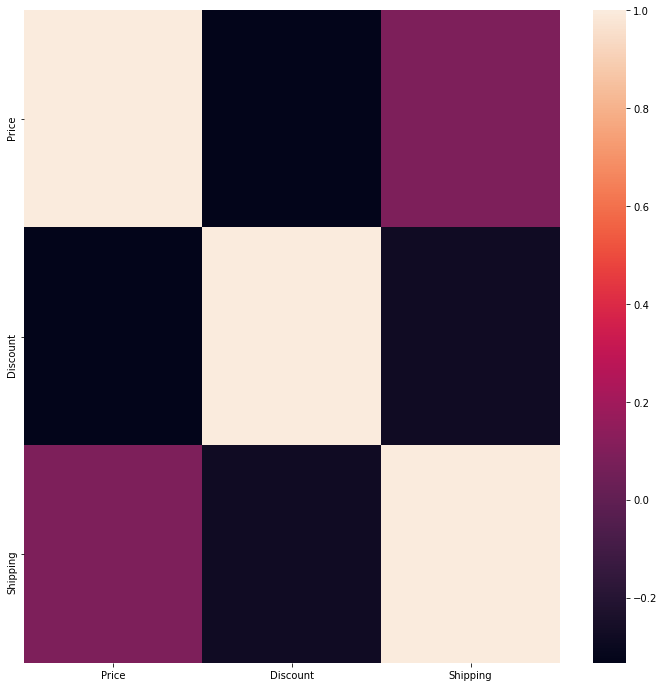

In [18]:
# heat map

import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure(figsize = (12 , 12))
sns.heatmap(correlation)